In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

from glob import glob
import numpy as np

from hubble_focus import analysis, automation, parameters

# Fitting a polynomial to points

I saved out my `fitpsf` results from prop 14063 to a space-delimited ASCII file. To read this in, the simplest approach is to use `np.loadtxt`.

This creates an (nstars x nparameters) 2D array.

In [6]:
results = np.loadtxt('/grp/hst/OTA/focus/source/KVG/uvis_field_dependence/coefficients/prop14063_p2_4simultaneous_standardtemplate_fitspherical_0p0__fixedblur_0p0_focusguesses.txt')
print(results.shape)

(1512, 31)


We'll pull out the columns corresponding to the pixel coordinates and y-astigmatism and plot these.

In [26]:
x = results[:,0]
y = results[:,1]
yastig = results[:,9]

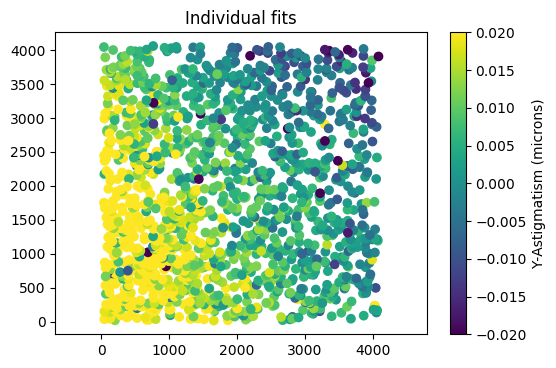

In [27]:
plt.scatter(x, y, c=yastig, vmin=-0.02, vmax=0.02)
plt.axis('equal')
plt.title('Individual fits')
plt.colorbar().set_label('Y-Astigmatism (microns)')

And, finally, we'll fit a 3rd-order polynomial to these points:

In [29]:
coefficients = automation.polyfit2d(x, y, yastig, order=3)
print(coefficients)

[  2.52761982e-02   3.44806404e-06  -1.80518610e-09  -5.47959151e-06
  -5.52493752e-09   1.18408699e-12  -2.70272104e-10   1.37136698e-12
  -2.74998127e-16]


# Evaluating a polynomial from coefficients

To evaluate at a single coordinate:

In [32]:
automation.polyval2d(567, 782, coefficients)

0.021926394466639566

To evaluate over the whole field:

In [62]:
xx = np.arange(0, 4096)
yy = np.arange(0, 4096)

field = automation.polygrid2d(xx, yy, coefficients)

In [84]:
field[567,782]

0.021926394466639566

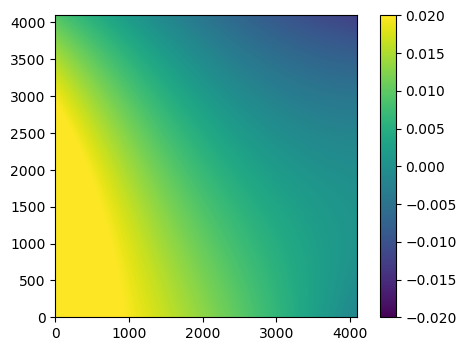

In [86]:
plt.imshow(field.T, origin='lower', vmin=-0.02, vmax=0.02) # transpose because matplotlib expects (y,x) rather than (x,y)
plt.colorbar()

# Reading from coefficient files

Here, the coefficients are already in a 2D array, so we can directly call `np.polynomial.polynomial.polyval2d` (rather than the helper functions in `automation`):

In [77]:
coeffs_square = parameters.get_coefficients('WFC3UVIS','yastig',2)

np.polynomial.polynomial.polyval2d(567, 782, coeffs_square)

0.021926394476104529